In [2]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

# Metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

## Load & merge stations dataset

In [3]:
station_list = ['station00','station01','station02','station03', 'station04', 'station05', 'station06', 'station07', 'station08', 'station09']

def load_stations(station_ids):
    df_list = []
    for station_id in station_ids:
        df = pd.read_csv('Data/'+station_id+'.csv')
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

df = load_stations(station_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271968 entries, 0 to 271967
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date_time          271968 non-null  object 
 1   nwp_globalirrad    271968 non-null  float64
 2   nwp_directirrad    271968 non-null  float64
 3   nwp_temperature    271968 non-null  float64
 4   nwp_humidity       271968 non-null  float64
 5   nwp_windspeed      271968 non-null  float64
 6   nwp_winddirection  271968 non-null  float64
 7   nwp_pressure       271968 non-null  float64
 8   lmd_totalirrad     271968 non-null  float64
 9   lmd_diffuseirrad   271968 non-null  float64
 10  lmd_temperature    271968 non-null  float64
 11  lmd_pressure       271968 non-null  float64
 12  lmd_winddirection  271968 non-null  float64
 13  lmd_windspeed      271968 non-null  float64
 14  power              271968 non-null  float64
dtypes: float64(14), object(1)
memory usage: 31.1+ MB


In [4]:
df.describe() # quick dataset overview

,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
count,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000,271968.000000
mean,167.131521,146.673547,11.879423,43.707950,3.966932,201.480485,976.258962,187.783183,96.241957,11.949000,977.380660,165.372346,1.152299,2.802003
std,245.452244,225.870885,11.077684,22.532668,2.337732,108.359392,43.809639,292.767323,159.124986,11.232015,44.862193,109.120790,1.244478,4.877402
min,0.000000,0.000000,-19.780000,4.640000,0.050000,0.000000,869.750000,0.000000,0.000000,-23.900000,867.799988,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.010000,26.040000,2.380000,106.910000,948.320000,0.000000,0.000000,3.100000,949.799988,67.000000,0.100000,0.000000
50%,0.000000,0.000000,11.610000,38.610000,3.460000,215.700000,989.530000,1.900000,0.000000,12.100000,988.799988,163.000000,0.900000,0.000000
75%,297.340000,252.090000,20.720000,58.030000,5.020000,301.290000,1010.280000,299.000000,139.000000,21.200001,1013.500000,258.000000,1.700000,3.686586
max,964.060000,910.090000,41.090000,100.000000,19.660000,360.000000,1044.790000,1838.000000,1122.000000,41.599998,1049.099976,359.959991,16.000000,35.118130


In [5]:
df.head()

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2018-08-15 16:00:00,0.0,0.0,22.78,96.85,4.28,339.41,1007.27,0.0,0.0,25.900000,1006.299988,353.0,1.1,0.0
1,2018-08-15 16:15:00,0.0,0.0,22.75,96.91,4.30,337.27,1007.27,0.0,0.0,25.900000,1006.200012,330.0,0.9,0.0
2,2018-08-15 16:30:00,0.0,0.0,22.71,96.95,4.28,334.47,1007.48,0.0,0.0,25.799999,1006.299988,1.0,1.9,0.0
3,2018-08-15 16:45:00,0.0,0.0,22.64,97.12,4.28,331.52,1007.39,0.0,0.0,25.600000,1006.299988,309.0,0.4,0.0
4,2018-08-15 17:00:00,0.0,0.0,22.57,97.15,4.33,329.78,1007.09,0.0,0.0,25.700001,1006.299988,335.0,1.6,0.0


## Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

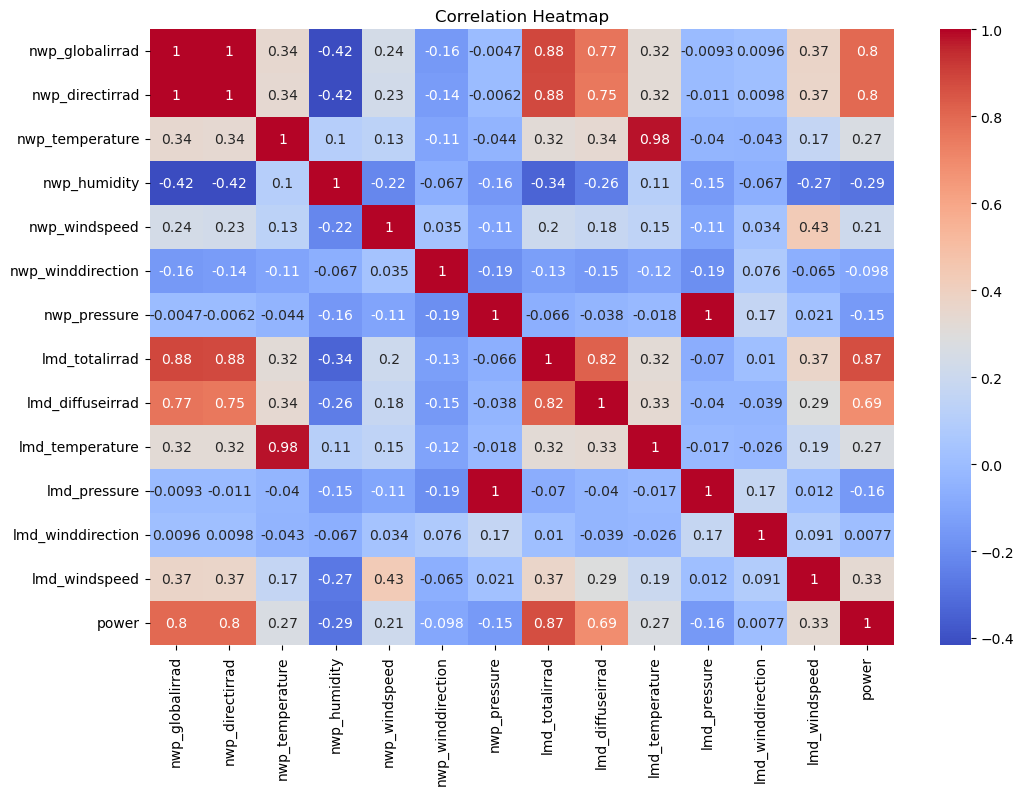

In [6]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')

## Define a target class

In [7]:
# Compute descriptive stats
mean_p = df['power'].mean()
std_p = df['power'].std()

# print for inspection
print(f"Mean: {mean_p:.2f}, Std: {std_p:.2f}, Max: {df['power'].max():.2f}")

# Classification rule
def categorize_power(p, q1, q3):
    if p < q1:
        return 'Low'
    elif p <= q3:
        return 'Medium'
    else:
        return 'High'

# Apply classification
q1, q3 = df['power'].quantile([0.33, 0.66])
df['power_class'] = df['power'].apply(categorize_power, args=(q1, q3))

# Check distribution
print(df['power_class'].value_counts())

Mean: 2.80, Std: 4.88, Max: 35.12
power_class
Medium    179500
High       92468
Name: count, dtype: int64


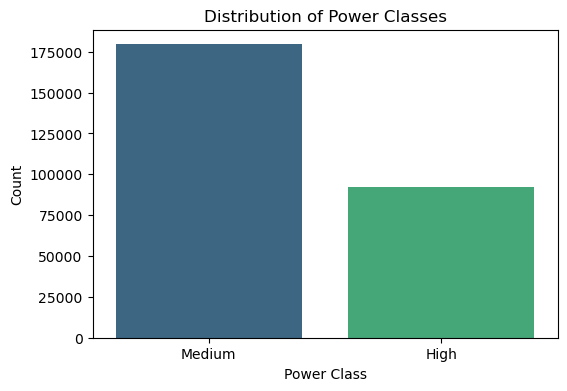

In [8]:
# visualization of the power class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='power_class', palette='viridis')
plt.title('Distribution of Power Classes')
plt.xlabel('Power Class')
plt.ylabel('Count')
plt.show()

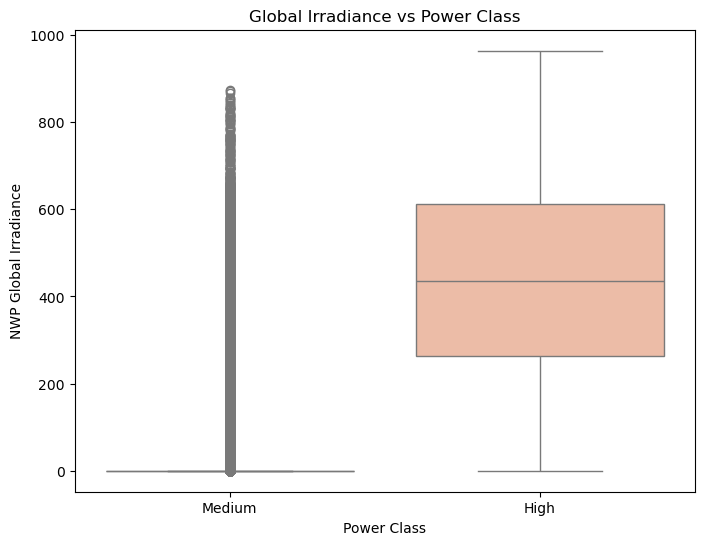

In [9]:
# relationship between Global Irradiance & Power Class
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='power_class', y='nwp_globalirrad', palette='coolwarm')
plt.title('Global Irradiance vs Power Class')
plt.xlabel('Power Class')
plt.ylabel('NWP Global Irradiance')
plt.show()

### Remove outliers for irradiance

In [10]:
def relabel_inconsistent_power(df, irr_col='global_irradiance', class_col='power_class'):
    df = df.copy()

    # Reassign power class based on irradiance logic
    df.loc[(df[irr_col] > 350) & (df[class_col] == 'Low'), class_col] = 'High'
    df.loc[(df[irr_col] > 350) & (df[class_col] == 'Medium'), class_col] = 'High'
    df.loc[(df[irr_col] < 350) & (df[irr_col] > 100) & (df[class_col] == 'High'), class_col] = 'Medium'
    df.loc[(df[irr_col] < 350) & (df[irr_col] > 100) & (df[class_col] == 'Low'), class_col] = 'Medium'
    df.loc[(df[irr_col] < 100) & (df[class_col] == 'Medium'), class_col] = 'Low'
    df.loc[(df[irr_col] < 100) & (df[class_col] == 'High'), class_col] = 'Low'
    
    return df
df = relabel_inconsistent_power(df, irr_col='nwp_globalirrad', class_col='power_class')

### Plot again

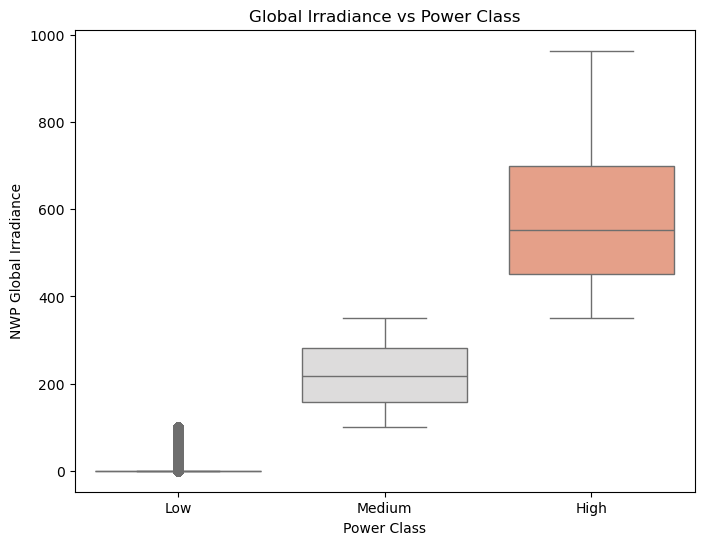

In [11]:
# relationship between Global Irradiance & Power Class
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='power_class', y='nwp_globalirrad', palette='coolwarm')
plt.title('Global Irradiance vs Power Class')
plt.xlabel('Power Class')
plt.ylabel('NWP Global Irradiance')
plt.show()

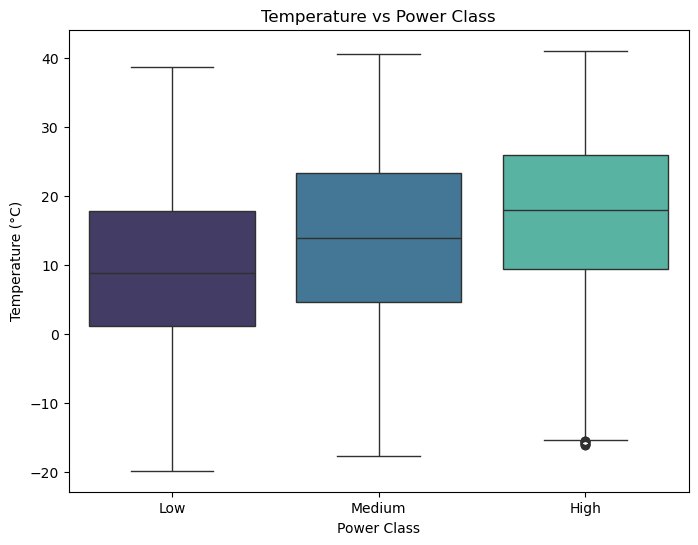

In [12]:
# relationship between temperature & Power Class
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='power_class', y='nwp_temperature', palette='mako')
plt.title('Temperature vs Power Class')
plt.xlabel('Power Class')
plt.ylabel('Temperature (°C)')
plt.show()

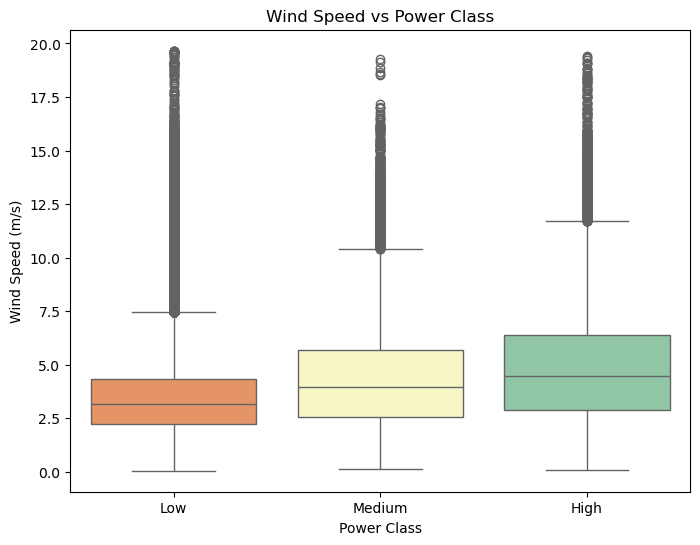

In [13]:
# relationship between wind speed & Power Class
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='power_class', y='nwp_windspeed', palette='Spectral')
plt.title('Wind Speed vs Power Class')
plt.xlabel('Power Class')
plt.ylabel('Wind Speed (m/s)')
plt.show()

### Relabel inconsistent wind

In [14]:
def relabel_inconsistent_wind(df, wind_col='wind_speed', class_col='power_class'):
    df = df.copy()

    # Reassign based on observed logical wind speed ranges
    df.loc[(df[wind_col] > 6) & (df[class_col] == 'Low'), class_col] = 'High'
    df.loc[(df[wind_col] > 6) & (df[class_col] == 'Medium'), class_col] = 'High'
    
    df.loc[(df[wind_col] < 6) & (df[wind_col] > 3) & (df[class_col] == 'High'), class_col] = 'Medium'
    df.loc[(df[wind_col] < 6) & (df[wind_col] > 3) & (df[class_col] == 'Low'), class_col] = 'Medium'
    
    df.loc[(df[wind_col] < 3) & (df[class_col] == 'Medium'), class_col] = 'Low'
    df.loc[(df[wind_col] < 3) & (df[class_col] == 'High'), class_col] = 'Low'
    
    return df

df = relabel_inconsistent_wind(df, wind_col='nwp_windspeed', class_col='power_class')

### Check visual again

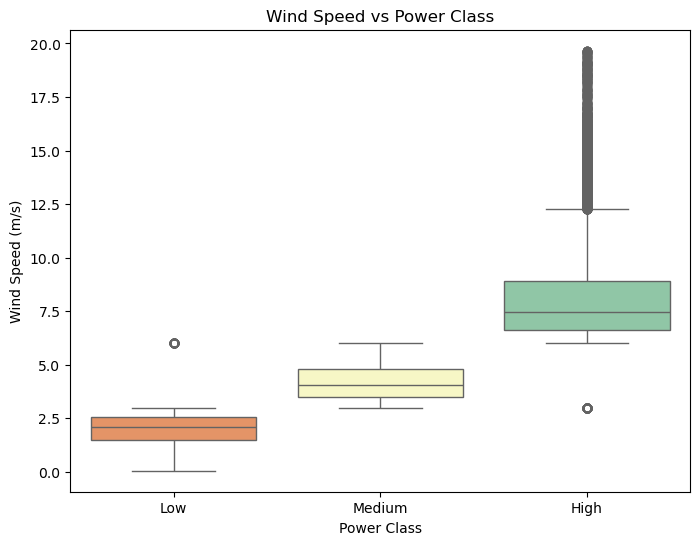

In [15]:
# relationship between wind speed & Power Class
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='power_class', y='nwp_windspeed', palette='Spectral', order=['Low', 'Medium', 'High'])
plt.title('Wind Speed vs Power Class')
plt.xlabel('Power Class')
plt.ylabel('Wind Speed (m/s)')
plt.show()

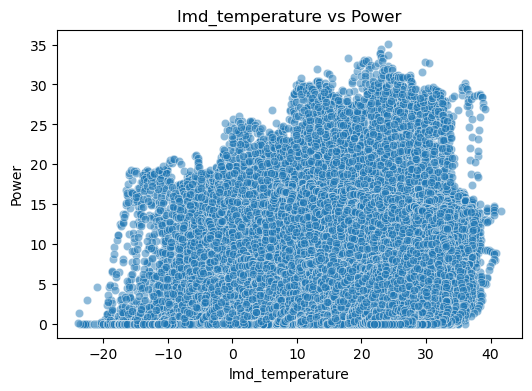

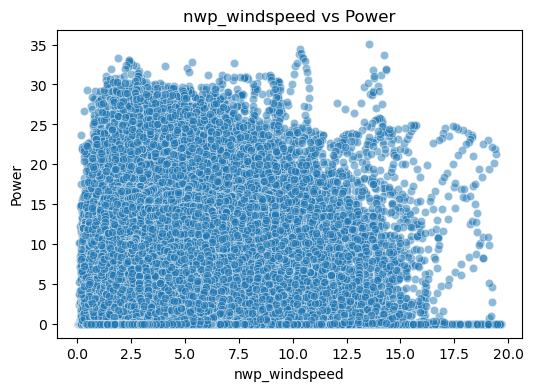

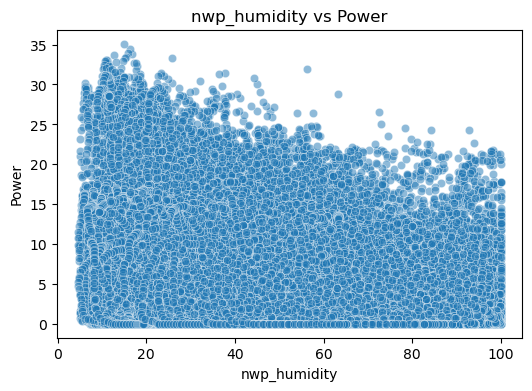

In [16]:
# Scatterplots (1:1)
features = ['nwp_globalirradiance', 'lmd_temperature', 'nwp_windspeed', 'nwp_humidity']
for feat in [f for f in features if f in df.columns]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feat], y=df['power'], alpha=0.5)
    plt.title(f'{feat} vs Power')
    plt.xlabel(feat)
    plt.ylabel('Power')
    plt.show()

- **Solar power** depends heavily on the hour (sun position) and month (seasonal variation).

## Feature engineering

In [17]:
# Since date_time is key in solar prediction, we’ll extract time-based components.

# Extract temporal features
df['date_time'] = pd.to_datetime(df['date_time']) + pd.Timedelta(hours=8)
df['hour'] = df['date_time'].dt.hour
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['dayofweek'] = df['date_time'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

In [18]:
# Convert degrees to radians
df['winddir_rad_nwp'] = np.deg2rad(df['nwp_winddirection'])
df['winddir_rad_lmd'] = np.deg2rad(df['lmd_winddirection'])

# Compute wind vector components
df['nwp_wind_u'] = df['nwp_windspeed'] * np.cos(df['winddir_rad_nwp'])
df['nwp_wind_v'] = df['nwp_windspeed'] * np.sin(df['winddir_rad_nwp'])

df['lmd_wind_u'] = df['lmd_windspeed'] * np.cos(df['winddir_rad_lmd'])
df['lmd_wind_v'] = df['lmd_windspeed'] * np.sin(df['winddir_rad_lmd'])


This allows models like Random Forest or Logistic Regression to learn wind effects correctly directional angles alone can be misleading since 0° and 360° are “close”. 

In [19]:
# Difference and ratio between models
df['irrad_diff'] = df['nwp_globalirrad'] - df['lmd_totalirrad']
df['irrad_ratio'] = df['nwp_globalirrad'] / (df['lmd_totalirrad'] + 1e-5)

#Helps the model see how much the forecasts differ sometimes that variance correlates with power uncertainty.

We have two irradiance sources: nwp_globalirrad and lmd_totalirrad. We can create comparative or combined features.

In [20]:
#Sometimes solar efficiency depends on the mix of temperature and humidity.
df['temp_humidity_index'] = df['nwp_temperature'] * (1 - df['nwp_humidity']/100)
#This approximates perceived heat — higher values can mean less efficient panels.

In [21]:
#We can remove columns that are no longer needed or redundant.
df.drop(columns=['date_time', 'winddir_rad_nwp', 'winddir_rad_lmd'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271968 entries, 0 to 271967
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   nwp_globalirrad      271968 non-null  float64
 1   nwp_directirrad      271968 non-null  float64
 2   nwp_temperature      271968 non-null  float64
 3   nwp_humidity         271968 non-null  float64
 4   nwp_windspeed        271968 non-null  float64
 5   nwp_winddirection    271968 non-null  float64
 6   nwp_pressure         271968 non-null  float64
 7   lmd_totalirrad       271968 non-null  float64
 8   lmd_diffuseirrad     271968 non-null  float64
 9   lmd_temperature      271968 non-null  float64
 10  lmd_pressure         271968 non-null  float64
 11  lmd_winddirection    271968 non-null  float64
 12  lmd_windspeed        271968 non-null  float64
 13  power                271968 non-null  float64
 14  power_class          271968 non-null  object 
 15  hour             

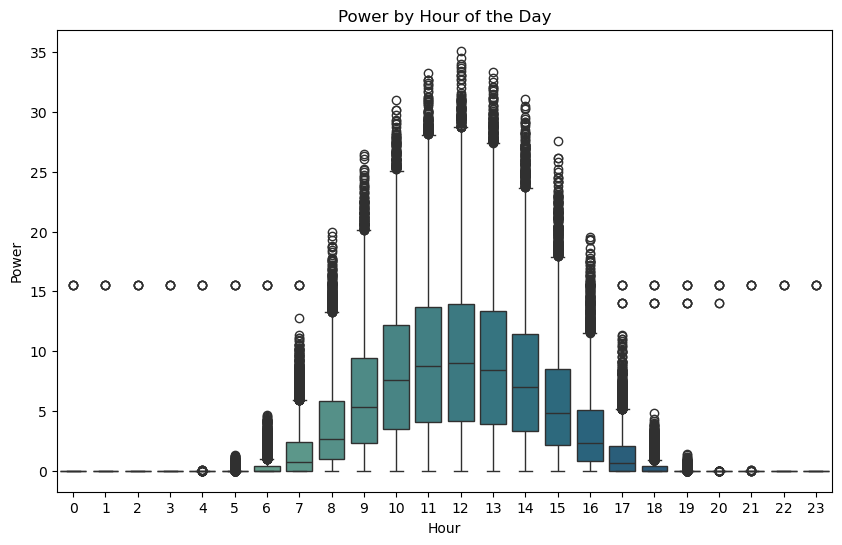

In [23]:
# visualize average power per hour of the day
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='hour', y='power', palette='crest')
plt.title('Power by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Power')
plt.show()

### Remove outliers for night hours

In [24]:
# Remove unrealistic power values during night hours
df.loc[(df['hour'].isin(range(0,7)) | df['hour'].isin(range(19,24))) & (df['power'] > 0.2), 'power'] = 0

### Check visual again

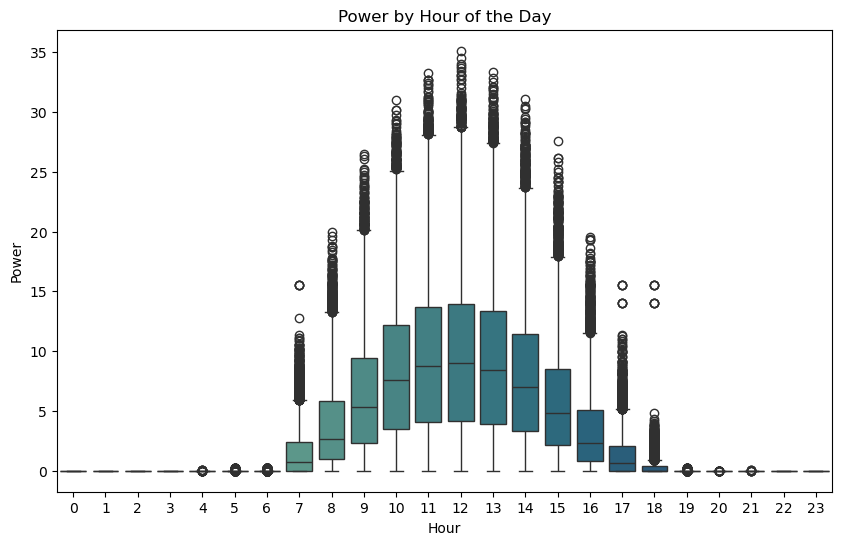

In [25]:
# visualize average power per hour of the day
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='hour', y='power', palette='crest')
plt.title('Power by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Power')
plt.show()

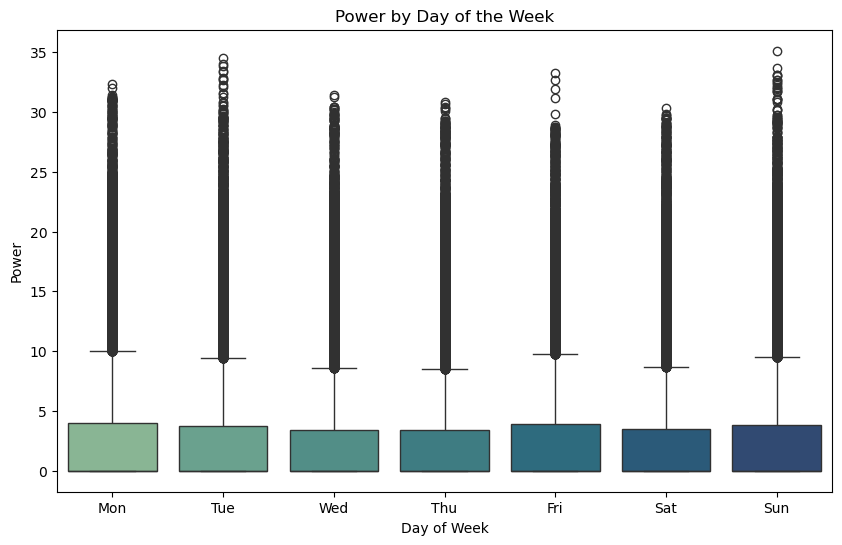

In [26]:
# visualize average power per hour of the day
# Map numeric days to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['dayofweek'].map(day_map)

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='day_name', y='power', palette='crest', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Power by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Power')
plt.show()

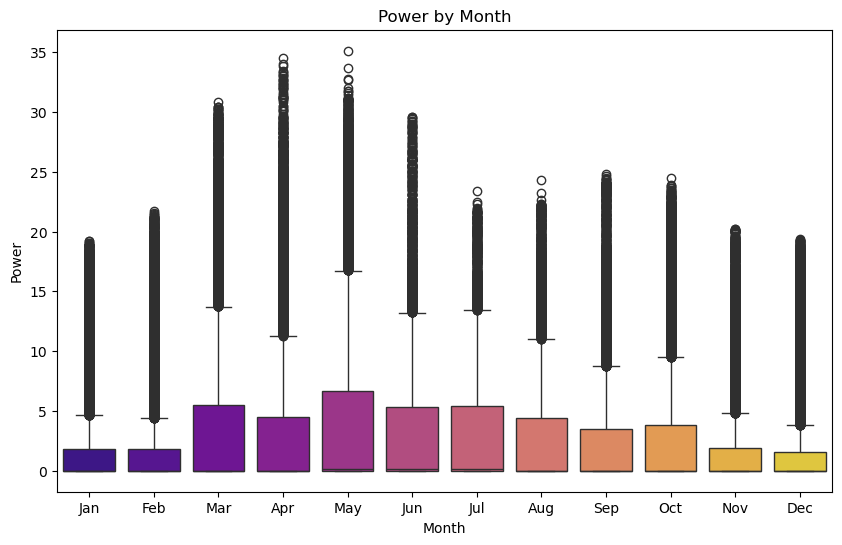

In [27]:
# visualizing of power by month
# Map numeric month to short month names
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['month_name'] = df['month'].map(month_map)

# Plot with ordered months
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df, 
    x='month_name', 
    y='power', 
    palette='plasma',
    order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.title('Power by Month')
plt.xlabel('Month')
plt.ylabel('Power')
plt.show()

In [28]:
# remove temporary column
df.drop(columns=['day_name','month_name'], inplace=True)

## Separate Features and Target

In [39]:
# We’ll keep power_class as the target and remove power since it’s the raw numeric version.

# Separate features and target
X = df[['nwp_globalirrad', 'nwp_temperature', 'nwp_humidity',
        'nwp_windspeed', 'nwp_pressure', 'hour', 'month']]
y = df['power_class']

## Correlation-Based Redundancy Removal

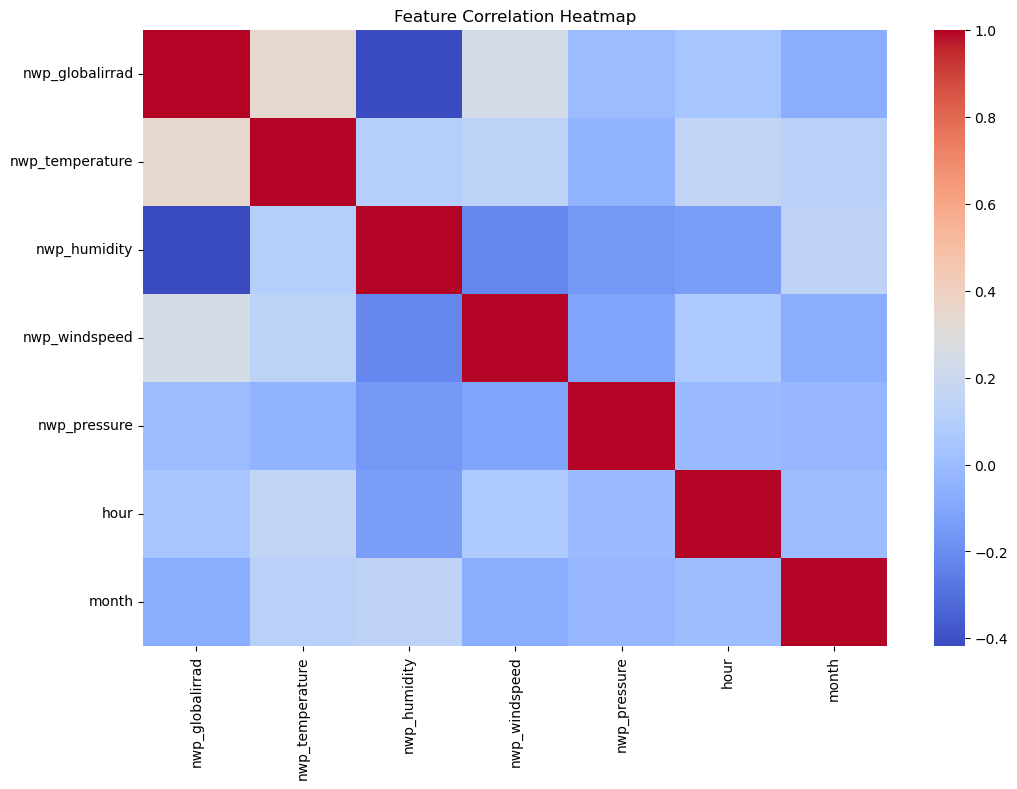

In [40]:
# Compute correlation matrix
corr_matrix = X.corr()

# Optional: visualize
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [41]:
# Identify highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:")
print(to_drop)

# Drop them
X_reduced = X.drop(columns=to_drop)

Highly correlated features to drop:
[]


## Modeling

### Temporal Split

In [ ]:
#Now, we’ll split the data in time orderly to respect temporal dependencies.
split_index = int(len(df) * 0.8)

X_train = X_reduced.iloc[:split_index]
X_test = X_reduced.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

## Scaling and encoding

In [44]:
# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression model fit 

In [45]:
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train_scaled, y_train_enc)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test_enc, y_pred_lr))
print(classification_report(y_test_enc, y_pred_lr, target_names=le.classes_))

Logistic Regression Accuracy: 0.9985108651689525
              precision    recall  f1-score   support

        High       1.00      0.99      1.00      7978
         Low       1.00      1.00      1.00     22475
      Medium       1.00      1.00      1.00     23941

    accuracy                           1.00     54394
   macro avg       1.00      1.00      1.00     54394
weighted avg       1.00      1.00      1.00     54394



### Random forest model fit

In [46]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_enc)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test_enc, y_pred_rf))
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.9999264624774792
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      7978
         Low       1.00      1.00      1.00     22475
      Medium       1.00      1.00      1.00     23941

    accuracy                           1.00     54394
   macro avg       1.00      1.00      1.00     54394
weighted avg       1.00      1.00      1.00     54394



### Confusion matrix for the models

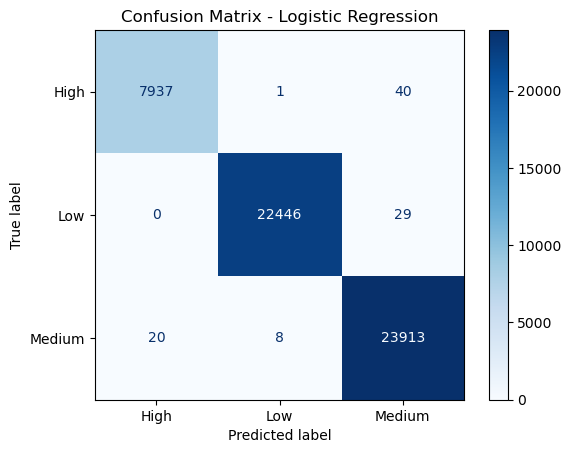

In [36]:
# Compute confusion matrix
cm_lr = confusion_matrix(y_test_enc, y_pred_lr)

# Display
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

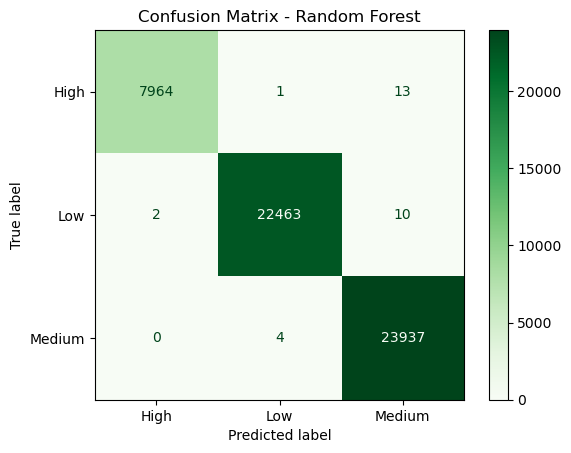

In [37]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)

# Display
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Interpret feature importance

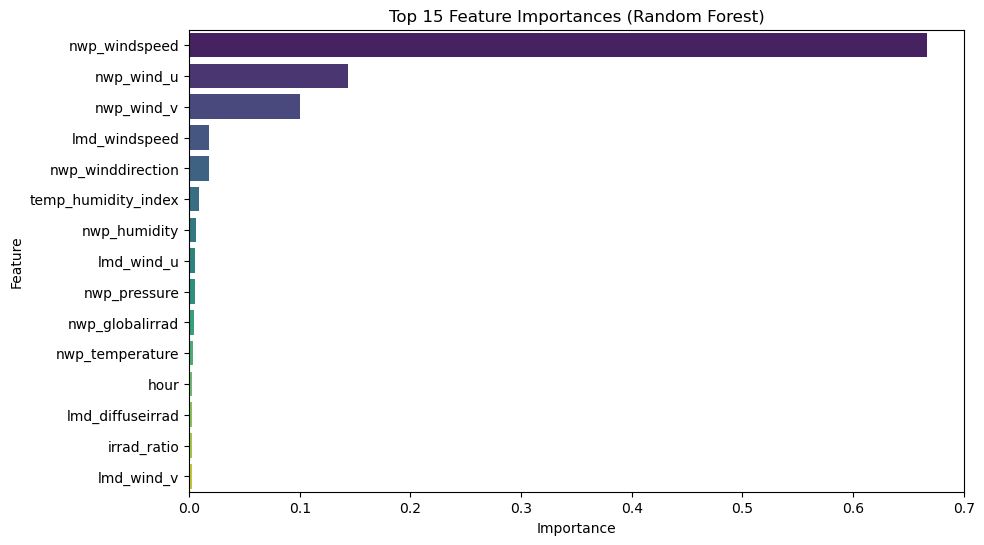

In [38]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15], palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()